In [1]:
#Import dependencies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
crypto_data = pd.read_csv('crypto_data.csv')
crypto_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Only trading cryptos only
trading_data = crypto_data[crypto_data['IsTrading'] == True]
trading_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
#Clean DF
trading_data.drop('IsTrading', axis=1, inplace=True)

#Droping Null values
trading_data.dropna(inplace=True)

# Get only values that have mined coins 
trading_data = trading_data[trading_data['TotalCoinsMined'] > 0]

# Drop CoinName
trading_data.drop('CoinName', axis=1, inplace=True)

# Create dummy data
dummy_df = pd.get_dummies(trading_data)

dummy_df.head()


C:\Users\bhati\anaconda3\envs\pythondata2\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-5-a31e68520a2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_data.dropna(inplace=True)


,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Scale and transform data

scaled_df = StandardScaler().fit_transform(dummy_df)

pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(scaled_df)
len(crypto_pca)

532

In [7]:
crypto_pca_df = pd.DataFrame(data = crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-6.148590e-16,-2.400162e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,-0.286779,-0.135378,-1.264176e-15,-1.986760e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-2.766289e-16,-1.112014e-15,-9.704808e-16,-4.579975e-15,-1.071291e-15,-9.112578e-16,2.111679e-16,1.101101e-17,3.393286e-15,1.333127e-15
2,0.361159,-0.003304,6.963442e-15,-3.471687e-15,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,2.084374e-15,5.667991e-16,-1.030001e-15,-6.543365e-16,8.685237e-17,-9.898903e-17,-8.015823e-16,-4.808255e-15,2.255091e-15,6.998357e-15
3,-0.287881,-0.256431,-6.751110e-15,-5.377331e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,9.589445e-01,-2.439077e-01,1.187326e+00,3.593888e-01,7.615274e-01,-8.850484e-01,-5.487857e-01,-4.798273e-01,2.017009e+00,-9.384493e-01
4,-0.136884,-0.256819,-4.099924e-15,-4.316488e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,1.472206e+00,-6.454413e-03,4.619024e-01,1.819309e+00,-3.479958e-01,2.767201e+00,7.057698e-01,1.255319e-01,4.332682e-01,1.993603e-01


In [9]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)

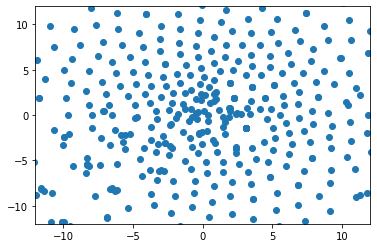

In [10]:
crypto_pca_df['x'] = tsne_features[:,0]
crypto_pca_df['y'] = tsne_features[:,1]
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.show()

C:\Users\bhati\anaconda3\envs\pythondata2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


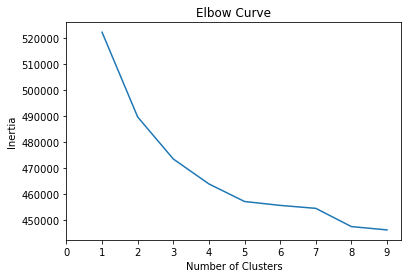

In [11]:
intertia = []
k = list(range(1,10))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    intertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': intertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.show()

C:\Users\bhati\anaconda3\envs\pythondata2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


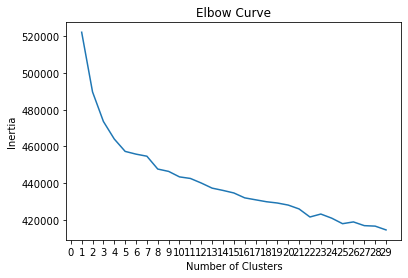

In [12]:
intertia = []
k = list(range(1,30))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    intertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': intertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(30)))
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Based on this data, it appears the clusters are optimal at 5 clusters. 